# Stocks

Compare Amazon and Walmart

In [20]:
# numbers and dataframe processing
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import quandl

import os
API_TOKEN = os.environ.get("API_TOKEN")
quandl.ApiConfig.api_key = API_TOKEN

In [21]:
stocks = quandl.get(['WIKI/AMZN.11','WIKI/WMT.11'])
stocks.columns = ["Amazon", "Walmart"]

In [22]:
stocks.describe()

,Amazon,Walmart
count,5248.000000,11496.000000
mean,201.504436,23.128088
std,281.781054,24.898234
min,1.395833,0.010624
25%,35.750000,0.828710
50%,72.660000,9.346481
75%,258.012500,40.905048
max,1598.390000,109.550000


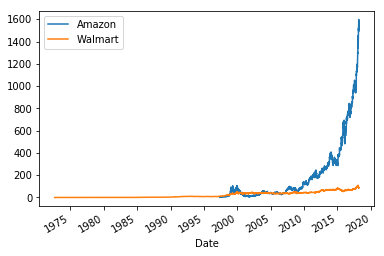

In [23]:
stocks.plot()

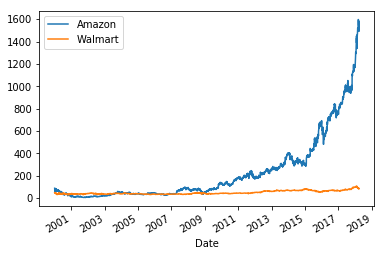

In [24]:
stocks_limited = stocks['2000-01-01':]
stocks_limited.plot()

An index is a way to measure direct changes in a value based on distance to the mean value. In time series analysis, we can use it to put Amazon and Walmart's stocks on a similar scale.

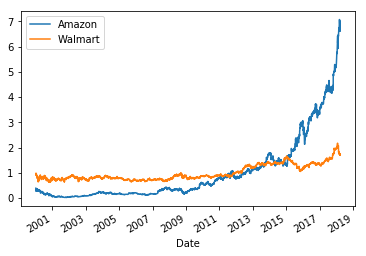

In [30]:
stocks_indices = stocks_limited / stocks_limited.mean()
stocks_indices.plot()

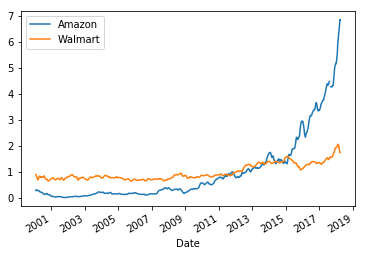

In [31]:
stocks_indices.rolling(window=20).mean().plot()


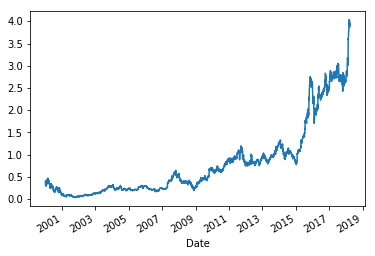

In [32]:
(stocks_indices.Amazon / stocks_indices.Walmart).plot()


In [33]:
def get_stocks(tickers=['AAPL', 'GOOG'], stock_display_names=None, start_date='2000-01-01', end_date='2018-01-01', window=20):
    quandl_stocks = []
    for ticker in tickers:
        quandl_stocks.append("WIKI/" + ticker + ".11")
    stocks_to_analyze = quandl.get(quandl_stocks)
    
    # display prefs
    if stock_display_names is not None:
        stocks_to_analyze.columns = stock_display_names
      
    stocks_to_analyze_transformed = (stocks_to_analyze[start_date:end_date] / stocks_to_analyze[start_date:end_date].mean()).rolling(window=window).mean()
    return stocks_to_analyze_transformed

Motley Fool top Value Stocks of 2017

From here: https://www.fool.com/investing/2017/04/21/top-value-stocks-of-2017.aspx

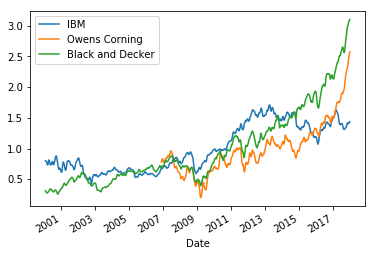

In [35]:
get_stocks(['IBM', 'OC', 'SWK'], ['IBM', 'Owens Corning', 'Black and Decker'], window=20).plot()
